## Pablo Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
gossipcop_fake = pd.read_csv('/content/drive/MyDrive/243/FakeNewsNet/dataset/gossipcop_fake.csv')
gossipcop_real = pd.read_csv('/content/drive/MyDrive/243/FakeNewsNet/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/content/drive/MyDrive/243/FakeNewsNet/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/content/drive/MyDrive/243/FakeNewsNet/dataset/politifact_real.csv')

# Data analysis

In [ ]:
gossipcop_fake.head()

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [ ]:
gossipcop_fake.describe()

,id,news_url,title,tweet_ids
count,5323,5067,5323,5135
unique,5323,4681,4896,5047
top,gossipcop-2493749932,www.newidea.com.au/jennifer-aniston-and-brad-p...,Connecting People Through News,900336607680761857\t900407896072216576\t900412...
freq,1,8,20,6


In [ ]:
df_no_tweets = pd.read_csv('/content/drive/MyDrive/243/FakeNewsNet/dataset/dataframe_text_no_tweets_v2.csv')
df_no_tweets

,Unnamed: 0,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
0,0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,dailymail,Did Miley Cyrus and Liam Hemsworth secretly ge...,2018-06-22,Congratulations might be in order for Miley Cy...,"['284329075902926848', '284332744559968256', '...",97,0
1,2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,variety,Celebrities Join Tax March in Protest of Donal...,2017-04-15,Thousands are taking the streets to protest Pr...,"['853359353532829696', '853359576543920128', '...",86,0
2,3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,dailymail,Cindy Crawford's daughter Kaia Gerber wears a ...,2016-03-18,We'd venture to say that Cindy Crawford's daug...,"['988821905196158981', '988824206556172288', '...",14,0
3,4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,variety,Full List of 2018 Oscar Nominations – Variety,2018-01-23,Oscar nominations for the 90th annual awards w...,"['955792793632432131', '955795063925301249', '...",66,0
4,5,5189580095,gossipcop,http://www.townandcountrymag.com/society/tradi...,townandcountrymag,Here's What Really Happened When JFK Jr. Met P...,2017-06-29,"During the summer of 1995, John F. Kennedy Jr....","['890253005299351552', '890401381814870016', '...",4,0
...,...,...,...,...,...,...,...,...,...,...,...
18997,23188,1204,politifact,http://select.nytimes.com/gst/abstract.html?re...,nytimes,IMPEACHMENT HINT STIRS HOUSE CLASH; Democratic...,1935-07-24,Full text is unavailable for this digitized ar...,['nan'],1,1
18998,23189,6931,politifact,http://www.politifact.com/truth-o-meter/promis...,politifact,The Obameter: Introduce a comprehensive immigr...,NaN,Immigration reform was a major component of Pr...,"['21096374968', '21096771824', '94134529928765...",137,1
18999,23190,13619,politifact,http://www.cnn.com/2017/01/05/politics/border-...,cnn,"Trump asking Congress, not Mexico, to pay for ...",2017-01-05,Story highlights The Trump transition team say...,"['817357495047979008', '817357627566985217', '...",976,1
19000,23192,329,politifact,https://web.archive.org/web/20080131000131/htt...,archive,Change We Can Believe In,2008-01-30,Remarks of Senator Barack Obama: The Past Vers...,"['634287923135909888', '946743411100536832', '...",182,1


In [ ]:
# Auxiliar function
def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "R": wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

# Preprocessing function
def preprocessing(doc):
  # Remove spaces at the beginning and end of the document:
  text = doc.strip()

  # Special Characters
  text = re.sub(r"[^A-Za-z]", " ", text)
  text = re.sub(r"\'s", " 's ", text)
  text = re.sub(r"\'ve", " 've ", text)
  text = re.sub(r"n\'t", " 't ", text)
  text = re.sub(r"\'re", " 're ", text)
  text = re.sub(r"\'d", " 'd ", text)
  text = re.sub(r"\'ll", " 'll ", text)
  text = re.sub(r",", " ", text)
  text = re.sub(r"\.", " ", text)
  text = re.sub(r"!", " ", text)
  text = re.sub(r"\(", " ( ", text)
  text = re.sub(r"\)", " ) ", text)
  text = re.sub(r"\?", " ", text)
  text = re.sub(r"\s{2,}", " ", text)

  remove_stopwords = True

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    words = [word for word in text.lower().split() if word not in stops]
  else:
    words = text

  text = " ".join(words)

  # Lemmatization:
  word_list = nltk.word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]
  
  return output

In [ ]:
title_corpus = ' '.join(df_no_tweets['title'])
title_words = preprocessing(title_corpus)
freq_words = Counter(title_words)

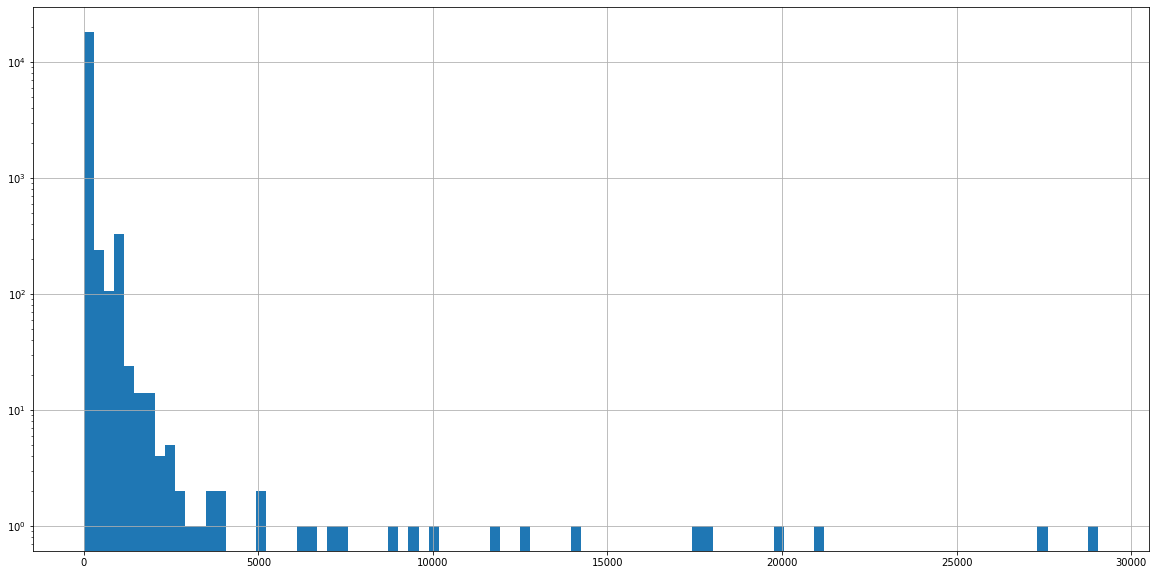

In [ ]:
df_no_tweets.sort_values(by = ['number_tweets'],ascending=False)['number_tweets'].hist(log=True, bins=100, figsize=(20,10))

# Modeling

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_test.csv")
df_val = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_val.csv")

In [ ]:
df_train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,title,publish_date,body,tweet_ids,fake_news,tweets_count,...,source_url_dailymail,source_url_elle,source_url_ew,source_url_hollywoodreporter,source_url_other,source_url_radaronline,source_url_today,source_url_usatoday,source_url_usmagazine,source_url_variety
0,0,0,0,6334,Kate Middleton Introduces a Mental Health Film...,2017-09-19,Kate Middleton wants kids to know it's OK to t...,"['909874031226179584', '909874938743422977', '...",0,42,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,3993,Topless activists crash Woody Allen concert in...,2017-07-13,Maeve McDermott\n\nUSA TODAY\n\nWoody Allen's ...,"['885215491786244097', '885215532491952128', '...",0,49,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,7342,"Jax Taylor, Brittany Cartwright, Lala Kent Sla...",2018-12-04,The cast of Vanderpump Rules has some choice w...,"['965963973383221248', '965964322051706880', '...",0,39,...,0,0,0,0,0,0,0,0,1,0
3,3,3,3,4965,Jon Hamm Slams Social Media: It's the 'Visual ...,2017-06-02,Jon Hamm is definitely not a fan of social med...,"['870829201619898369', '870829428758245376', '...",0,37,...,0,0,0,0,1,0,0,0,0,0
4,4,4,4,8422,'Bachelor' stars Nick Viall and Vanessa Grimal...,2017-08-29,"Fans were shocked when former ""Bachelor"" Nick ...","['902314666415669248', '902314904048291840', '...",0,45,...,0,0,0,0,0,0,1,0,0,0


## Word2Vec

### Titles

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
import gensim.downloader as gensim_api
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Function to preprocess text:
lst_stopwords = nltk.corpus.stopwords.words("english")

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
df_train['title_clean'] = df_train['title'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df_test['title_clean'] = df_test['title'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df_val['title_clean'] = df_val['title'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))


#### New word2vec corpus (n-grams with n=3)

In [ ]:
corpus = df_train['title_clean']

lst_corpus = []
for string in corpus:
  lst_words = string.split()
  lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
  lst_corpus.append(lst_grams)
lst_corpus[:2]

[['kate',
  'middleton',
  'introduces',
  'mental',
  'health',
  'film',
  'paying',
  'attention',
  'small',
  'feeling'],
 ['topless',
  'activist',
  'crash',
  'woody',
  'allen',
  'concert',
  'germany',
  'protest',
  'sexual',
  'violence']]

In [ ]:
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
# Fit word2vec model
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300, window=8, min_count=1, sg=1, iter=30)

In [ ]:
nlp.save("/content/drive/MyDrive/243/pretrained_models/word2vec_titles.model")

In [ ]:
nlp = gensim.models.word2vec.Word2Vec.load("/content/drive/MyDrive/243/pretrained_models/word2vec_titles.model")

In [ ]:
nlp_w2v_titles['kate'][:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.02580052, -0.27275458,  0.0571955 ,  0.24214172, -0.59261894,
       -0.30160606,  0.6056406 , -0.16483577,  0.29082063,  0.39567846,
        0.45291346, -0.2610637 ,  0.07058106,  0.01077816,  0.04884984,
       -0.5112494 , -0.022629  ,  0.21052764,  0.20020409, -0.3781396 ],
      dtype=float32)

In [ ]:
nlp['kate'][:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.47313485,  0.07398498,  0.17026575, -0.18279265, -0.44260147,
        0.18871655, -0.17541152,  0.32834083,  0.26193088,  0.1696098 ,
       -0.3718887 ,  0.18393493, -0.21594323,  0.09273278,  0.4985228 ,
       -0.533092  , -0.37951082,  0.31631058,  0.02048584, -0.17925912],
      dtype=float32)

In [ ]:
# Text tokenizing
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index

# Sequence creation
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)

# Padding (all sentences same length)
max_len = max([len(i) for i in lst_corpus])
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_len, padding="post", truncating="post")

In [ ]:
X_train.shape

(6699, 20)

In [ ]:
# Embedding matrix
embeddings = np.zeros((len(dic_vocabulary)+1, 300))

for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
embeddings.shape

(9539, 300)

In [ ]:
#embeddings.tofile("/content/drive/MyDrive/243/pretrained_models/emb_w2v_title.dat")
np.savetxt("/content/drive/MyDrive/243/pretrained_models/emb_w2v_title.csv", embeddings, delimiter=',')

In [ ]:
emb_w2v_title = np.loadtxt("/content/drive/MyDrive/243/pretrained_models/emb_w2v_title.csv", delimiter=',')

In [ ]:
emb_w2v_title.shape

(74294, 300)

#### Document vector generation (word2vec)

In [ ]:
def doc_word2vec(doc):
  sum_emb = np.zeros(len(embeddings[0]))
  words = doc.split()
  n_words = len(words)

  for word in words:
    try:
      word_id = dic_vocabulary[word]
      sum_emb += embeddings[word_id]
    except:
      n_words -= 1
  return sum_emb/len(words)

In [ ]:
# Create doc_emb_word2vec column
df_train['doc_emb_word2vec'] = df_train.apply(lambda x: doc_word2vec(x['title_clean']), axis=1)
df_test['doc_emb_word2vec'] = df_test.apply(lambda x: doc_word2vec(x['title_clean']), axis=1)
df_val['doc_emb_word2vec'] = df_val.apply(lambda x: doc_word2vec(x['title_clean']), axis=1)

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train = pd.DataFrame(df_train['doc_emb_word2vec'].to_list())
X_test = pd.DataFrame(df_test['doc_emb_word2vec'].to_list())
X_val = pd.DataFrame(df_val['doc_emb_word2vec'].to_list())

y_train = df_train['fake_news']
y_test = df_test['fake_news']
y_val = df_val['fake_news']

In [ ]:
logreg_w2v_titles = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg_w2v_titles.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
def acc(cm):
  return(round((cm[3]+ cm[0])/(cm[2]+cm[3]+cm[1]+cm[0]),3))

def tpr(cm):
  return(round(cm[3]/(cm[2]+cm[3]),3))

def fpr(cm):
  return(round(cm[1]/(cm[0]+cm[1]),3))

def f1(cm):
  return(round(2*cm[3]/(2*cm[3]+cm[2]+cm[1]),3))

In [ ]:
y_pred_logreg = logreg_w2v_titles.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

In [ ]:
cm_logreg

array([1727,  110,  435,  295])

In [ ]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.788
TPR logreg model : 0.404 
FPR logreg model : 0.06
F1 score logreg model : 0.52


In [ ]:
with open('/content/drive/MyDrive/243/pretrained_models/w2v_title_logreg.pickle', 'wb') as handle:
  pickle.dump(logreg_w2v_title, handle, protocol=pickle.HIGHEST_PROTOCOL)

##### CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 21),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=5, verbose=3)
dtc_cv_acc.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.520 total time=   3.3s
[CV 2/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.503 total time=   2.3s
[CV 3/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.509 total time=   2.9s
[CV 4/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.536 total time=   3.2s
[CV 5/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.515 total time=   3.0s
[CV 1/5] END ccp_alpha=0.005, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.444 total time=   2.5s
[CV 2/5] END ccp_alpha=0.005, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.404 total time=   2.9s
[CV

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='f1', verbose=3)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. CV f1):  0.0
Grid best score (CV f1):  0.5166639925925391


In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= dtc_cv_acc.best_params_['ccp_alpha'], # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train) #fit the decision tree

In [ ]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)

Accuracy Decision Tree Classifier : 0.721
TPR dtc model : 0.452 
FPR dtc model : 0.173
F1 score dtc model : 0.479


##### RF

In [ ]:
# Cross validation
#param_grid = {'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
#              'n_estimators': [500]}

#rf = RandomForestClassifier()
#rf_cv = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
#rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ...................max_features=2, n_estimators=500; total time=   8.4s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.8s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.9s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.8s
[CV] END ...................max_features=2, n_estimators=500; total time=   8.1s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.4s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.4s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.7s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.7s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.6s
[CV] END ...................max_features=4, n_estimators=500; total time=  13.1s
[CV] END ...................max_features=4, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [500]},
             scoring='f1', verbose=2)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  18
Grid best score (CV f1 score):  0.5854672776747458


In [ ]:
rf = RandomForestClassifier(max_features=18, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=18, n_estimators=500)

In [ ]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

Accuracy rf : 0.78
TPR rf model : 0.353 
FPR rf model : 0.051
F1 score rf model : 0.477


##### Boosting

In [ ]:
#pip install tune-sklearn ray[tune]

In [ ]:
from xgboost import XGBClassifier
from tune_sklearn import TuneGridSearchCV

grid_values = {'n_estimators': np.logspace(2, 3.7, 10, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': [5],
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tune_search = TuneGridSearchCV(XGBClassifier(), grid_values)

tune_search.fit(X_train, y_train)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', tune_search.best_params_['max_features'])
print('Grid best score (CV f1 score): ', tune_search.best_score_)

In [ ]:
gbc = XGBClassifier(n_estimators=300, learning_rate= 0.01, random_state=1, verbose=1,
                                max_leaf_nodes=5) 
gbc.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_leaf_nodes=5, n_estimators=300,
              random_state=1, verbose=1)

In [ ]:
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test)).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

Accuracy gbc : 0.78
TPR gbc model : 0.338 
FPR gbc model : 0.045
F1 score gbc model : 0.466


### Body

In [ ]:
df_train['body_clean'] = df_train['body'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df_test['body_clean'] = df_test['body'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df_val['body_clean'] = df_val['body'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

#### New word2vec corpus (n-grams with n=3)

In [ ]:
corpus = df_train['body_clean']

lst_corpus = []
for string in corpus:
  lst_words = string.split()
  lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
  lst_corpus.append(lst_grams)
#lst_corpus[:2]

In [ ]:
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
# Fit word2vec model
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300, window=8, min_count=1, sg=1, iter=30)

In [ ]:
nlp = 


In [ ]:
# Text tokenizing
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index

# Sequence creation
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)

# Padding (all sentences same length)
max_len = max([len(i) for i in lst_corpus])
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_len, padding="post", truncating="post")

In [ ]:
with open('/content/drive/MyDrive/243/pretrained_models/w2v_body_dic.pickle', 'wb') as handle:
  pickle.dump(dic_vocabulary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/243/pretrained_models/w2v_body_dic.pickle', 'rb') as handle:
    w2v_body_dic = pickle.load(handle)

In [ ]:
w2v_body_dic

{'NaN': 1,
 'said': 2,
 'one': 3,
 'time': 4,
 'like': 5,
 'year': 6,
 'new': 7,
 '1': 8,
 'show': 9,
 'also': 10,
 'first': 11,
 'say': 12,
 'get': 13,
 'people': 14,
 'may': 15,
 'would': 16,
 'star': 17,
 'love': 18,
 'season': 19,
 'life': 20,
 'know': 21,
 'u': 22,
 'two': 23,
 'day': 24,
 'im': 25,
 'back': 26,
 'family': 27,
 'told': 28,
 'thing': 29,
 'want': 30,
 'woman': 31,
 'think': 32,
 'make': 33,
 'going': 34,
 'really': 35,
 'dont': 36,
 'last': 37,
 'way': 38,
 'find': 39,
 'look': 40,
 'even': 41,
 'see': 42,
 'story': 43,
 'friend': 44,
 'together': 45,
 'made': 46,
 'go': 47,
 'best': 48,
 'film': 49,
 'couple': 50,
 'news': 51,
 'another': 52,
 'series': 53,
 'able': 54,
 'child': 55,
 'shes': 56,
 'content': 57,
 'photo': 58,
 'well': 59,
 'relationship': 60,
 'instagram': 61,
 'come': 62,
 'got': 63,
 'fan': 64,
 'thats': 65,
 'much': 66,
 'still': 67,
 'take': 68,
 'good': 69,
 'image': 70,
 'source': 71,
 'week': 72,
 'night': 73,
 'could': 74,
 'world': 75,
 '

In [ ]:
# Embedding matrix
embeddings = np.zeros((len(dic_vocabulary)+1, 300))

for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
embeddings.shape

(74294, 300)

#### Document vector generation (word2vec)

In [ ]:
# Create doc_emb_word2vec column
df_train['body_emb_word2vec'] = df_train.apply(lambda x: doc_word2vec(x['body_clean']), axis=1)
df_test['body_emb_word2vec'] = df_test.apply(lambda x: doc_word2vec(x['body_clean']), axis=1)
df_val['body_emb_word2vec'] = df_val.apply(lambda x: doc_word2vec(x['body_clean']), axis=1)

##### Logistic Regression

In [ ]:
X_train = pd.DataFrame(df_train['body_emb_word2vec'].to_list())
X_test = pd.DataFrame(df_test['body_emb_word2vec'].to_list())
X_val = pd.DataFrame(df_val['body_emb_word2vec'].to_list())

y_train = df_train['fake_news']
y_test = df_test['fake_news']
y_val = df_val['fake_news']

In [ ]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

In [ ]:
y_pred_logreg

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.824
TPR logreg model : 0.515 
FPR logreg model : 0.053
F1 score logreg model : 0.625


In [ ]:
logreg_w2v_bodies = logreg

In [ ]:
with open('/content/drive/MyDrive/243/pretrained_models/w2v_body_logreg.pickle', 'wb') as handle:
  pickle.dump(logreg_w2v_bodies, handle, protocol=pickle.HIGHEST_PROTOCOL)

##### CART

In [ ]:
# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 21),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=5, verbose=3)
dtc_cv_acc.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.477 total time=   3.6s
[CV 2/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.503 total time=   3.4s
[CV 3/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.508 total time=   2.0s
[CV 4/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.522 total time=   2.0s
[CV 5/5] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.516 total time=   2.1s
[CV 1/5] END ccp_alpha=0.005, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.272 total time=   2.1s
[CV 2/5] END ccp_alpha=0.005, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.318 total time=   2.1s
[CV

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='f1', verbose=3)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. CV f1):  0.0
Grid best score (CV f1):  0.505121676238167


In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= dtc_cv_acc.best_params_['ccp_alpha'], # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train) #fit the decision tree

In [ ]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)

Accuracy Decision Tree Classifier : 0.75
TPR dtc model : 0.474 
FPR dtc model : 0.14
F1 score dtc model : 0.519


##### RF

In [ ]:
# Cross validation
param_grid = {'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'n_estimators': [500]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ...................max_features=2, n_estimators=500; total time=  11.6s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.4s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.5s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.4s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.4s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.6s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.9s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.8s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.7s
[CV] END ...................max_features=3, n_estimators=500; total time=  11.2s
[CV] END ...................max_features=4, n_estimators=500; total time=  11.8s
[CV] END ...................max_features=4, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [500]},
             scoring='f1', verbose=2)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  17
Grid best score (CV f1 score):  0.5626636632341917


In [ ]:
rf = RandomForestClassifier(max_features=17, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=17, n_estimators=500)

In [ ]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

Accuracy rf : 0.807
TPR rf model : 0.4 
FPR rf model : 0.032
F1 score rf model : 0.541


##### Boosting

In [ ]:
#pip install tune-sklearn ray[tune]

In [ ]:
from xgboost import XGBClassifier
from tune_sklearn import TuneGridSearchCV

grid_values = {'n_estimators': np.logspace(2, 3.7, 10, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': [5],
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tune_search = TuneGridSearchCV(XGBClassifier(), grid_values)

tune_search.fit(X_train, y_train)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', tune_search.best_params_['max_features'])
print('Grid best score (CV f1 score): ', tune_search.best_score_)

In [ ]:
from xgboost import XGBClassifier
gbc = XGBClassifier(n_estimators=1000, learning_rate= 0.01, random_state=1, verbose=1,
                                max_leaf_nodes=5) 
gbc.fit(X_train, y_train)

In [ ]:
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test)).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

## Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
df_train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,title,publish_date,body,tweet_ids,fake_news,tweets_count,...,source_url_elle,source_url_ew,source_url_hollywoodreporter,source_url_other,source_url_radaronline,source_url_today,source_url_usatoday,source_url_usmagazine,source_url_variety,title_clean
0,0,0,0,6334,Kate Middleton Introduces a Mental Health Film...,2017-09-19,Kate Middleton wants kids to know it's OK to t...,"['909874031226179584', '909874938743422977', '...",0,42,...,0,0,0,1,0,0,0,0,0,kate middleton introduces mental health film p...
1,1,1,1,3993,Topless activists crash Woody Allen concert in...,2017-07-13,Maeve McDermott\n\nUSA TODAY\n\nWoody Allen's ...,"['885215491786244097', '885215532491952128', '...",0,49,...,0,0,0,0,0,0,1,0,0,topless activist crash woody allen concert ger...
2,2,2,2,7342,"Jax Taylor, Brittany Cartwright, Lala Kent Sla...",2018-12-04,The cast of Vanderpump Rules has some choice w...,"['965963973383221248', '965964322051706880', '...",0,39,...,0,0,0,0,0,0,0,1,0,jax taylor brittany cartwright lala kent slam ...
3,3,3,3,4965,Jon Hamm Slams Social Media: It's the 'Visual ...,2017-06-02,Jon Hamm is definitely not a fan of social med...,"['870829201619898369', '870829428758245376', '...",0,37,...,0,0,0,1,0,0,0,0,0,jon hamm slam social medium visual equivalent ...
4,4,4,4,8422,'Bachelor' stars Nick Viall and Vanessa Grimal...,2017-08-29,"Fans were shocked when former ""Bachelor"" Nick ...","['902314666415669248', '902314904048291840', '...",0,45,...,0,0,0,0,0,1,0,0,0,bachelor star nick viall vanessa grimaldi spea...


In [ ]:
corpus_titles = df_train['title_clean']

lst_corpus_titles = []
for string in corpus_titles:
  lst_words = string.split()
  lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
  lst_corpus_titles.append(lst_grams)
lst_corpus_titles[:2]

[['kate',
  'middleton',
  'introduces',
  'mental',
  'health',
  'film',
  'paying',
  'attention',
  'small',
  'feeling'],
 ['topless',
  'activist',
  'crash',
  'woody',
  'allen',
  'concert',
  'germany',
  'protest',
  'sexual',
  'violence']]

In [ ]:
corpus_bodies = df_train['body_clean']

lst_corpus_bodies = []
for string in corpus_bodies:
  lst_words = string.split()
  lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
  lst_corpus_bodies.append(lst_grams)
lst_corpus_bodies[:1]

[['kate',
  'middleton',
  'want',
  'kid',
  'know',
  'ok',
  'talk',
  'mental',
  'health',
  'duchess',
  'cambridge',
  'soontobe',
  'mother',
  'three',
  'provided',
  'brief',
  'introduction',
  'new',
  'short',
  'childrens',
  'film',
  'subject',
  'titled',
  'talking',
  'mental',
  'health',
  'mental',
  'health',
  'feel',
  'think',
  'middleton',
  'say',
  'intro',
  'thing',
  'cant',
  'really',
  'seen',
  'affect',
  'u',
  'every',
  'day',
  'talking',
  'feel',
  'difficult',
  'animated',
  'film',
  'created',
  'anna',
  'freud',
  'national',
  'centre',
  'child',
  'family',
  'ukbased',
  'mental',
  'health',
  'charity',
  'focused',
  'childrens',
  'care',
  'video',
  'help',
  'u',
  'talk',
  'mental',
  'health',
  'say',
  'talk',
  'feeling',
  'big',
  'manage',
  'middleton',
  'say',
  'film',
  'kid',
  'depicted',
  'doodled',
  'thumbprint',
  'introduce',
  'concept',
  'small',
  'feeling',
  'fleeting',
  'positive',
  'negative',

In [ ]:
# Tagged data:
tagged_titles = [TaggedDocument(d, [i]) for i, d in enumerate(lst_corpus_titles)]
tagged_bodies = [TaggedDocument(d, [i]) for i, d in enumerate(lst_corpus_bodies)]

In [ ]:
doc2vec_titles = Doc2Vec(tagged_titles, vector_size=300, window=3, min_count=1, workers=4, epochs = 30)

In [ ]:
doc2vec_bodies = Doc2Vec(tagged_bodies, vector_size=300, window=3, min_count=1, workers=4, epochs = 30)

In [ ]:
doc2vec_titles.infer_vector(df_train['title_clean'][0].split())[:10]

array([ 0.00553111,  0.01153182, -0.02195209,  0.05342896, -0.01728271,
        0.06127452,  0.00207847,  0.06286526,  0.053737  , -0.05830006],
      dtype=float32)

In [ ]:
df_train['doc2vec_title'] = df_train.apply(lambda x: doc2vec_titles.infer_vector(x['title_clean'].split()), axis=1)
df_train['doc2vec_body'] = df_train.apply(lambda x: doc2vec_titles.infer_vector(x['body_clean'].split()), axis=1)
df_test['doc2vec_title'] = df_test.apply(lambda x: doc2vec_titles.infer_vector(x['title_clean'].split()), axis=1)
df_test['doc2vec_body'] = df_test.apply(lambda x: doc2vec_titles.infer_vector(x['body_clean'].split()), axis=1)
df_val['doc2vec_title'] = df_val.apply(lambda x: doc2vec_titles.infer_vector(x['title_clean'].split()), axis=1)
df_val['doc2vec_body'] = df_val.apply(lambda x: doc2vec_titles.infer_vector(x['body_clean'].split()), axis=1)

In [ ]:
X_train_titles = pd.DataFrame(df_train['doc2vec_title'].to_list())
X_test_titles = pd.DataFrame(df_test['doc2vec_title'].to_list())
X_val_titles = pd.DataFrame(df_val['doc2vec_title'].to_list())

X_train_body = pd.DataFrame(df_train['doc2vec_body'].to_list())
X_test_body = pd.DataFrame(df_test['doc2vec_body'].to_list())
X_val_body = pd.DataFrame(df_val['doc2vec_body'].to_list())

y_train = df_train['fake_news']
y_test = df_test['fake_news']
y_val = df_val['fake_news']

In [ ]:
from sklearn.linear_model import LogisticRegression

#####Logistic Regression Titles

In [ ]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train_titles, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_logreg = logreg.predict(X_test_titles)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

In [ ]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.749
TPR logreg model : 0.285 
FPR logreg model : 0.066
F1 score logreg model : 0.392


##### Logistic Regression body

In [ ]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train_body, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_logreg = logreg.predict(X_test_body)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

In [ ]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.789
TPR logreg model : 0.425 
FPR logreg model : 0.066
F1 score logreg model : 0.534


##### CART Titles

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 21),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=10, verbose=3)
dtc_cv_acc.fit(X_train_titles, y_train) 

Fitting 10 folds for each of 21 candidates, totalling 210 fits
[CV 1/10] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.407 total time=   2.4s
[CV 2/10] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.377 total time=   2.4s
[CV 3/10] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.453 total time=   2.5s
[CV 4/10] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.442 total time=   2.5s
[CV 5/10] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.383 total time=   2.6s
[CV 6/10] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.409 total time=   2.4s
[CV 7/10] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88;, score=0.479 total time=   2.5s

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='f1', verbose=3)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. CV f1):  0.0
Grid best score (CV f1):  0.4171719269721799


In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.0005, # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train_titles, y_train) #fit the decision tree

In [ ]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test_titles)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)

Accuracy Decision Tree Classifier : 0.647
TPR dtc model : 0.407 
FPR dtc model : 0.257
F1 score dtc model : 0.396


##### CART Body

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.05, 21),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=5, verbose=1)
dtc_cv_acc.fit(X_train_body, y_train) 

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
       0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375,
       0.04  , 0.0425, 0.045 , 0.0475, 0.05  ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='f1', verbose=1)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. CV f1):  0.0
Grid best score (CV f1):  0.4828726793715477


In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.0005, # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train_body, y_train) #fit the decision tree

In [ ]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test_body)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)

Accuracy Decision Tree Classifier : 0.735
TPR dtc model : 0.482 
FPR dtc model : 0.164
F1 score dtc model : 0.509


##### RF Titles

In [ ]:
# Cross validation
param_grid = {'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'n_estimators': [500]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
rf_cv.fit(X_train_titles, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ...................max_features=2, n_estimators=500; total time=   9.3s
[CV] END ...................max_features=2, n_estimators=500; total time=  10.8s
[CV] END ...................max_features=2, n_estimators=500; total time=   9.9s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.6s
[CV] END ...................max_features=2, n_estimators=500; total time=   9.5s
[CV] END ...................max_features=3, n_estimators=500; total time=  13.6s
[CV] END ...................max_features=3, n_estimators=500; total time=  10.3s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.7s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.8s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.8s
[CV] END ...................max_features=4, n_estimators=500; total time=  12.0s
[CV] END ...................max_features=4, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [500]},
             scoring='f1', verbose=2)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  16
Grid best score (CV f1 score):  0.4258855518801826


In [ ]:
rf_title = RandomForestClassifier(max_features=16, n_estimators=500)
rf_title.fit(X_train_titles, y_train)

RandomForestClassifier(max_features=16, n_estimators=500)

In [ ]:
cm_rf = confusion_matrix(y_test, rf_title.predict(X_test_titles)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

Accuracy rf : 0.755
TPR rf model : 0.333 
FPR rf model : 0.077
F1 score rf model : 0.436


##### RF Body

In [ ]:
# Cross validation
param_grid = {'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'n_estimators': [500]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
rf_cv.fit(X_train_body, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ...................max_features=2, n_estimators=500; total time=   8.2s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.7s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.3s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.3s
[CV] END ...................max_features=2, n_estimators=500; total time=   7.3s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.6s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.7s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.7s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.8s
[CV] END ...................max_features=3, n_estimators=500; total time=   9.7s
[CV] END ...................max_features=4, n_estimators=500; total time=  12.1s
[CV] END ...................max_features=4, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [500]},
             scoring='f1', verbose=2)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  14
Grid best score (CV f1 score):  0.5687980744993242


In [ ]:
rf_body = RandomForestClassifier(max_features=14, n_estimators=500)
rf_body.fit(X_train_body, y_train)

RandomForestClassifier(max_features=14, n_estimators=500)

In [ ]:
cm_rf = confusion_matrix(y_test, rf_body.predict(X_test_body)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

Accuracy rf : 0.797
TPR rf model : 0.442 
FPR rf model : 0.062
F1 score rf model : 0.554


##### Boosting Title

In [ ]:
#pip install tune-sklearn ray[tune]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from tune_sklearn import TuneGridSearchCV

grid_values = {'n_estimators': np.logspace(2, 3.7, 10, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': [5],
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tune_search = TuneGridSearchCV(GradientBoostingClassifier(), grid_values)

tune_search.fit(X_train_titles, y_train)

/usr/local/lib/python3.7/dist-packages/ray/tune/tune.py:379: UserWarning: The `loggers` argument is deprecated. Please pass the respective `LoggerCallback` classes to the `callbacks` argument instead. See https://docs.ray.io/en/latest/tune/api_docs/logging.html
  "The `loggers` argument is deprecated. Please pass the respective "


In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', tune_search.best_params_['max_features'])
print('Grid best score (CV f1 score): ', tune_search.best_score_)

In [ ]:
from xgboost import XGBClassifier
gbc = XGBClassifier(n_estimators=2000, learning_rate= 0.01, random_state=1, verbose=1,
                                max_leaf_nodes=5) 
gbc.fit(X_train_titles, y_train)

In [ ]:
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test)).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

##### Boosting Body

In [ ]:
grid_values = {'n_estimators': np.logspace(2, 3.7, 10, dtype='int32'),               'learning_rate': [0.01],
               'max_leaf_nodes': [5],
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tune_search = TuneGridSearchCV(GradientBoostingClassifier(), grid_values)

tune_search.fit(X_train_titles, y_train)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', tune_search.best_params_['max_features'])
print('Grid best score (CV f1 score): ', tune_search.best_score_)

In [ ]:
from xgboost import XGBClassifier
gbc = XGBClassifier(n_estimators=1000, learning_rate= 0.01, random_state=1, verbose=1,
                                max_leaf_nodes=5) 
gbc.fit(X_train_titles, y_train)

In [ ]:
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test)).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

## Word2Vec + Other features

In [ ]:
df_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'title', 'publish_date', 'body', 'tweet_ids', 'fake_news',
       'tweets_count', 'Retweet', 'Like', 'Reply', 'Hour', 'Weekday', 'Month',
       'index', 'source_url_billboard', 'source_url_dailymail',
       'source_url_elle', 'source_url_ew', 'source_url_hollywoodreporter',
       'source_url_other', 'source_url_radaronline', 'source_url_today',
       'source_url_usatoday', 'source_url_usmagazine', 'source_url_variety',
       'title_clean', 'doc_emb_word2vec'],
      dtype='object')

In [ ]:
cols = ['tweets_count', 'Retweet', 'Like', 'Reply', 'Hour', 'Weekday', 'Month',
       'source_url_billboard', 'source_url_dailymail', 'source_url_elle',
       'source_url_ew', 'source_url_hollywoodreporter', 'source_url_other',
       'source_url_radaronline', 'source_url_today', 'source_url_usatoday',
       'source_url_usmagazine', 'source_url_variety']

X_train_combine = df_train.copy()[cols]
X_val_combine = df_val.copy()[cols]
X_test_combine = df_test.copy()[cols]

X_train_combine['w2v_title'] = logreg_w2v_titles.predict(pd.DataFrame(df_train['doc_emb_word2vec'].to_list()))
X_train_combine['w2v_body'] = logreg_w2v_bodies.predict(pd.DataFrame(df_train['body_emb_word2vec'].to_list()))

X_test_combine['w2v_title'] = logreg_w2v_titles.predict(pd.DataFrame(df_test['doc_emb_word2vec'].to_list()))
X_test_combine['w2v_body'] = logreg_w2v_bodies.predict(pd.DataFrame(df_test['body_emb_word2vec'].to_list()))

X_val_combine['w2v_title'] = logreg_w2v_titles.predict(pd.DataFrame(df_val['doc_emb_word2vec'].to_list()))
X_val_combine['w2v_body'] = logreg_w2v_bodies.predict(pd.DataFrame(df_val['body_emb_word2vec'].to_list()))

### Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train_combine,y_train)

y_pred_logreg = logreg.predict(X_test_combine)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.818
TPR logreg model : 0.53 
FPR logreg model : 0.068
F1 score logreg model : 0.624


### CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 51),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=10, verbose=1)
dtc_cv_acc.fit(X_train_combine, y_train) 

print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Fitting 10 folds for each of 51 candidates, totalling 510 fits
Grid best parameter ccp_alpha (max. CV f1):  0.0
Grid best score (CV f1):  0.7658828609470734


In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= dtc_cv_acc.best_params_['ccp_alpha'],
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train_combine, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test, dtc.predict(X_test_combine)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)

Accuracy Decision Tree Classifier : 0.871
TPR dtc model : 0.7 
FPR dtc model : 0.062
F1 score dtc model : 0.755


### Random Forest

In [ ]:
grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 


rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='f1', cv=5)
rf_cv.fit(X_train_combine, y_train)

print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  12
Grid best score (CV f1 score):  0.7945525790976371


In [ ]:
rf = RandomForestClassifier(max_features=rf_cv.best_params_['max_features'], 
                            min_samples_leaf=5,
                            n_estimators = 500,
                            random_state=88,
                            verbose=1)
rf.fit(X_train_combine, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.6s finished


RandomForestClassifier(max_features=12, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=1)

In [ ]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test_combine)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy rf : 0.88
TPR rf model : 0.721 
FPR rf model : 0.057
F1 score rf model : 0.773


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


### Boosting

In [ ]:
pip install tune_sklearn

     |████████████████████████████████| 40 kB 1.8 MB/s 
     |████████████████████████████████| 52.7 MB 145 kB/s 
     |████████████████████████████████| 4.1 MB 39.4 MB/s 
     |████████████████████████████████| 225 kB 50.8 MB/s 
     |████████████████████████████████| 125 kB 54.0 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.44.0
    Uninstalling grpcio-1.44.0:
      Successfully uninstalled grpcio-1.44.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
from xgboost import XGBClassifier
from tune_sklearn import TuneGridSearchCV

grid_values = {'n_estimators': np.logspace(2, 3.7, 5, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': [5],
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tune_search = TuneGridSearchCV(XGBClassifier(), grid_values)

tune_search.fit(X_train_combine, y_train)

print('Grid best parameter ccp_alpha (max. CV f1 score): ', tune_search.best_params_['max_features'])
print('Grid best score (CV f1 score): ', tune_search.best_score_)

In [ ]:
gbc = XGBClassifier(n_estimators=2000, learning_rate= 0.01, random_state=88, verbose=1,
                                max_leaf_nodes=11) 
gbc.fit(X_train_combine, y_train)

XGBClassifier(learning_rate=0.01, max_leaf_nodes=11, n_estimators=2000,
              random_state=88, verbose=1)

In [ ]:
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test_combine)).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy rf :', acc_gbc)
print('TPR rf model :', tpr_gbc, '\nFPR rf model :', fpr_gbc)
print('F1 score rf model :', f1_gbc)

Accuracy rf : 0.89
TPR rf model : 0.721 
FPR rf model : 0.043
F1 score rf model : 0.788


## Doc2Vec + Other features

In [ ]:
df_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'title', 'publish_date', 'body', 'tweet_ids', 'fake_news',
       'tweets_count', 'Retweet', 'Like', 'Reply', 'Hour', 'Weekday', 'Month',
       'index', 'source_url_billboard', 'source_url_dailymail',
       'source_url_elle', 'source_url_ew', 'source_url_hollywoodreporter',
       'source_url_other', 'source_url_radaronline', 'source_url_today',
       'source_url_usatoday', 'source_url_usmagazine', 'source_url_variety',
       'title_clean', 'body_clean', 'doc2vec_title', 'doc2vec_body'],
      dtype='object')

In [ ]:
cols = ['tweets_count', 'Retweet', 'Like', 'Reply', 'Hour', 'Weekday', 'Month',
       'source_url_billboard', 'source_url_dailymail', 'source_url_elle',
       'source_url_ew', 'source_url_hollywoodreporter', 'source_url_other',
       'source_url_radaronline', 'source_url_today', 'source_url_usatoday',
       'source_url_usmagazine', 'source_url_variety']

X_train_combine = df_train.copy()[cols]
X_val_combine = df_val.copy()[cols]
X_test_combine = df_test.copy()[cols]

X_train_combine['d2v_title'] = rf_title.predict(pd.DataFrame(df_train['doc2vec_title'].to_list()))
X_train_combine['d2v_body'] = rf_body.predict(pd.DataFrame(df_train['doc2vec_body'].to_list()))

X_test_combine['d2v_title'] = rf_title.predict(pd.DataFrame(df_test['doc2vec_title'].to_list()))
X_test_combine['d2v_body'] = rf_body.predict(pd.DataFrame(df_test['doc2vec_body'].to_list()))

X_val_combine['d2v_title'] = rf_title.predict(pd.DataFrame(df_val['doc2vec_title'].to_list()))
X_val_combine['d2v_body'] = rf_body.predict(pd.DataFrame(df_val['doc2vec_body'].to_list()))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train_combine,y_train)

y_pred_logreg = logreg.predict(X_test_combine)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.785
TPR logreg model : 0.382 
FPR logreg model : 0.056
F1 score logreg model : 0.502


### CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 51),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=10, verbose=1)
dtc_cv_acc.fit(X_train_combine, y_train) 

print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Fitting 10 folds for each of 51 candidates, totalling 510 fits
Grid best parameter ccp_alpha (max. CV f1):  0.0
Grid best score (CV f1):  1.0


In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= dtc_cv_acc.best_params_['ccp_alpha'],
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train_combine, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test, dtc.predict(X_test_combine)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)

Accuracy Decision Tree Classifier : 0.797
TPR dtc model : 0.442 
FPR dtc model : 0.062
F1 score dtc model : 0.554


### Random Forest

In [ ]:
grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 


rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='f1', cv=5)
rf_cv.fit(X_train_combine, y_train)

print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  1
Grid best score (CV f1 score):  1.0


In [ ]:
rf = RandomForestClassifier(max_features=1, 
                            min_samples_leaf=5,
                            n_estimators = 500,
                            random_state=88,
                            verbose=1)
rf.fit(X_train_combine, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.1s finished


RandomForestClassifier(max_features=1, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=1)

In [ ]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test_combine)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy rf : 0.811
TPR rf model : 0.393 
FPR rf model : 0.023
F1 score rf model : 0.542


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


### Boosting

In [ ]:
pip install tune_sklearn

     |████████████████████████████████| 40 kB 3.2 MB/s 
     |████████████████████████████████| 52.7 MB 81 kB/s 
     |████████████████████████████████| 225 kB 61.7 MB/s 
     |████████████████████████████████| 4.1 MB 38.1 MB/s 
     |████████████████████████████████| 125 kB 41.8 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.44.0
    Uninstalling grpcio-1.44.0:
      Successfully uninstalled grpcio-1.44.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
from xgboost import XGBClassifier
from tune_sklearn import TuneGridSearchCV

grid_values = {'n_estimators': np.logspace(2, 3.7, 5, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': [5],
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tune_search = TuneGridSearchCV(XGBClassifier(), grid_values)

tune_search.fit(X_train_combine, y_train)

print('Grid best parameter ccp_alpha (max. CV f1 score): ', tune_search.best_params_['max_features'])
print('Grid best score (CV f1 score): ', tune_search.best_score_)

In [ ]:
from xgboost import XGBClassifier
gbc = XGBClassifier(n_estimators=1500, learning_rate= 0.01, random_state=88, verbose=1,
                                max_leaf_nodes=11) 
gbc.fit(X_train_combine, y_train)

XGBClassifier(learning_rate=0.01, max_leaf_nodes=11, n_estimators=1500,
              random_state=88, verbose=1)

In [ ]:
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test_combine)).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy rf :', acc_gbc)
print('TPR rf model :', tpr_gbc, '\nFPR rf model :', fpr_gbc)
print('F1 score rf model :', f1_gbc)

Accuracy rf : 0.755
TPR rf model : 0.333 
FPR rf model : 0.077
F1 score rf model : 0.436


# Module 3

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_test.csv")
df_val = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_val.csv")

## Word2vec (LogReg) + Boosting (All features)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#NECESSARY FUNCTIONS

lst_stopwords = nltk.corpus.stopwords.words("english")

# Text preprocessing
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

def gen_embedding(nlp, dic_vocabulary):
  # Embedding matrix
  embeddings = np.zeros((len(dic_vocabulary)+1, 300))

  for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

  return embeddings

def mean_word2vec(doc, embeddings, dic_vocabulary):
  sum_emb = np.zeros(len(embeddings[0]))
  words = doc.split()
  n_words = len(words)

  for word in words:
    try:
      word_id = dic_vocabulary[word]
      sum_emb += embeddings[word_id]
    except:
      n_words -= 1
  return sum_emb/len(words)

def boosting(gbc, df):
  cols = ['tweets_count', 'Retweet', 'Like', 'Reply', 'Hour', 'Weekday', 'Month',
       'source_url_billboard', 'source_url_dailymail', 'source_url_elle',
       'source_url_ew', 'source_url_hollywoodreporter', 'source_url_other',
       'source_url_radaronline', 'source_url_today', 'source_url_usatoday',
       'source_url_usmagazine', 'source_url_variety']

  X_combine = df.copy()[cols]

  X_combine['title_pred'] = df['title_pred']
  X_combine['body_pred'] = df['body_pred']

  return gbc.predict(X_combine)

def acc(cm):
  return(round((cm[3]+ cm[0])/(cm[2]+cm[3]+cm[1]+cm[0]),3))

def tpr(cm):
  return(round(cm[3]/(cm[2]+cm[3]),3))

def fpr(cm):
  return(round(cm[1]/(cm[0]+cm[1]),3))

def f1(cm):
  return(round(2*cm[3]/(2*cm[3]+cm[2]+cm[1]),3))

In [ ]:
# Load models:
nlp_w2v_title = gensim.models.word2vec.Word2Vec.load("/content/drive/MyDrive/243/pretrained_models/word2vec_titles.model")
nlp_w2v_body = gensim.models.word2vec.Word2Vec.load("/content/drive/MyDrive/243/pretrained_models/word2vec_body.model")

# Load vocabularies:
with open('/content/drive/MyDrive/243/pretrained_models/w2v_title_dic.pickle', 'rb') as handle:
    w2v_title_dic = pickle.load(handle)
with open('/content/drive/MyDrive/243/pretrained_models/w2v_body_dic.pickle', 'rb') as handle:
    w2v_body_dic = pickle.load(handle)

# Load logreg models:
with open('/content/drive/MyDrive/243/pretrained_models/w2v_title_logreg.pickle', 'rb') as handle:
    w2v_title_logreg = pickle.load(handle)
with open('/content/drive/MyDrive/243/pretrained_models/w2v_body_logreg.pickle', 'rb') as handle:
    w2v_body_logreg = pickle.load(handle)

# Load boosting model:
with open('/content/drive/MyDrive/243/pretrained_models/gbc.pickle', 'rb') as handle:
    gbc = pickle.load(handle)

# Generate embeddings:
emd_w2v_title = gen_embedding(nlp_w2v_title, w2v_title_dic)
emd_w2v_body = gen_embedding(nlp_w2v_body, w2v_body_dic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
perf_df = pd.DataFrame(columns=['threshold', 'FP', 'FN', 'TP', 'TN'])

for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:

  df_test['title_clean'] = df_test['title'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
  df_test['title_emb'] = df_test['title_clean'].apply(lambda x: mean_word2vec(x, emd_w2v_title, w2v_title_dic))
  #df_test['title_pred'] = df_test['title_emb'].apply(lambda x: w2v_title_logreg.predict(x.reshape(1, -1))[0])
  df_test['title_pred_prob'] = df_test['title_emb'].apply(lambda x: w2v_title_logreg.predict_proba(x.reshape(1, -1))[0][1])
  df_test['title_pred'] = df_test['title_pred_prob'].apply(lambda x: x > threshold)

  df_test['body_clean'] = df_test['body'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
  df_test['body_emb'] = df_test['body_clean'].apply(lambda x: mean_word2vec(x, emd_w2v_body, w2v_body_dic))
  #df_test['body_pred'] = df_test['body_emb'].apply(lambda x: w2v_body_logreg.predict(x.reshape(1, -1))[0])
  df_test['body_pred_prob'] = df_test['body_emb'].apply(lambda x: w2v_title_logreg.predict_proba(x.reshape(1, -1))[0][1])
  df_test['body_pred'] = df_test['body_pred_prob'].apply(lambda x: x > threshold)

  df_test['pred'] = boosting(gbc, df_test)

  y_test = df_test['fake_news']
  cm_gbc = confusion_matrix(y_test, df_test['pred'])

  perf_df.loc[len(perf_df.index)] = [threshold, cm_gbc[0][1], cm_gbc[1][0], cm_gbc[1][1], cm_gbc[0][0]]


In [ ]:
perf_df

,threshold,FP,FN,TP,TN
0,0.1,592.0,42.0,688.0,1245.0
1,0.2,316.0,68.0,662.0,1521.0
2,0.3,183.0,121.0,609.0,1654.0
3,0.4,115.0,155.0,575.0,1722.0
4,0.5,81.0,196.0,534.0,1756.0
5,0.6,65.0,238.0,492.0,1772.0
6,0.7,54.0,268.0,462.0,1783.0
7,0.8,51.0,305.0,425.0,1786.0
8,0.9,39.0,334.0,396.0,1798.0


In [ ]:
y_test = df_test['fake_news']
cm_gbc = confusion_matrix(y_test, df_test['pred']).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy:', acc_gbc)
print('TPR:', tpr_gbc, '\nFPR:', fpr_gbc)
print('F1 score:', f1_gbc)

Accuracy: 0.855
TPR: 0.542 
FPR: 0.021
F1 score: 0.68


In [ ]:
confusion_matrix(y_test, df_test['pred'])

array([[1654,  183],
       [ 121,  609]])

In [ ]:
cm_gbc =confusion_matrix(y_test, df_test['pred'])

In [ ]:
cm_gbc

array([[1654,  183],
       [ 121,  609]])

In [2]:
#@title 
import pandas as pd
comparison_data = {'Word2Vec': ['{:.3f}'.format(0.788),
                                     '{:.4f}'.format(0.890),
                                     '{:.3f}'.format(0.721),
                                     '{:.4f}'.format(0.043)]}

comparison_table = pd.DataFrame(data=comparison_data, index=['f1-score','accuracy', 'TPR', 'FPR'])
comparison_table.style.set_properties(**{'font-size': '11pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '11pt')]}])

,Word2Vec
f1-score,0.788
accuracy,0.8900
TPR,0.721
FPR,0.0430
